## FFNN
Predecir el precio medio de una casa en miles de dólares a partir de 13 variables predictoras.
### Librerías

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Cargar los datos de entrenamiento

| Variable | Descripción  |
|----------|-----------------------|
| **CRIM** | Tasa de criminalidad per cápita por ciudad |
| **ZN** | Proporción de terreno residencial destinado a lotes mayores de 25,000 pies cuadrados |
| **INDUS** | Proporción de acres de negocios no minoristas por ciudad |
| **CHAS** | Variable dummy del Río Charles (= 1 si la parcela limita con el río; 0 en caso contrario) |
| **NOX** | Concentración de óxidos de nitrógeno (partes por 10 millones) |
| **RM** | Promedio de habitaciones por vivienda |
| **AGE** | Proporción de unidades ocupadas por sus dueños construidas antes de 1940 |
| **DIS** | Distancias ponderadas a cinco centros de empleo de Boston |
| **RAD** | Índice de accesibilidad a carreteras radiales |
| **TAX** | Tasa de impuesto predial por cada $10,000 de valor total |
| **PTRATIO** | Proporción alumno-maestro por ciudad |
| **B** | 1000(Bk - 0.63)^2 donde Bk es la proporción de personas afroamericanas por ciudad |
| **LSTAT** | % de población con estatus socioeconómico bajo |
| **MEDV** | Valor promedio de viviendas ocupadas por sus dueños (en miles de dólares) |

In [13]:
datos = pd.read_csv('BostonHousing.csv')
display(datos.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


### Separar características (X) y variable objetivo (y)

In [ ]:
X = datos.drop('MEDV', axis=1).values  
y = datos['MEDV'].values

### Transformar los datos

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

### Definir y configurar el modelo

In [21]:
class BostonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(13, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        return self.output(x)

model = BostonModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Entrenar el modelo

In [22]:
epochs = 500
losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/500], Loss: 14.2655
Epoch [100/500], Loss: 8.7008
Epoch [150/500], Loss: 7.0687
Epoch [200/500], Loss: 6.1983
Epoch [250/500], Loss: 5.6869
Epoch [300/500], Loss: 5.3226
Epoch [350/500], Loss: 5.0140
Epoch [400/500], Loss: 4.7342
Epoch [450/500], Loss: 4.4968
Epoch [500/500], Loss: 4.2821


### Evaluación del modelo

In [24]:
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze().numpy()
    y_test_np = y_test.squeeze().numpy()

mse = mean_squared_error(y_test_np, predictions)
mae = mean_absolute_error(y_test_np, predictions)
r2 = r2_score(y_test_np, predictions)

print("Evaluación del modelo:")
print(f"MSE:  {mse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

Evaluación del modelo:
MSE:  6.6383
MAE:  1.8730
R²:   0.9095


### Visualización

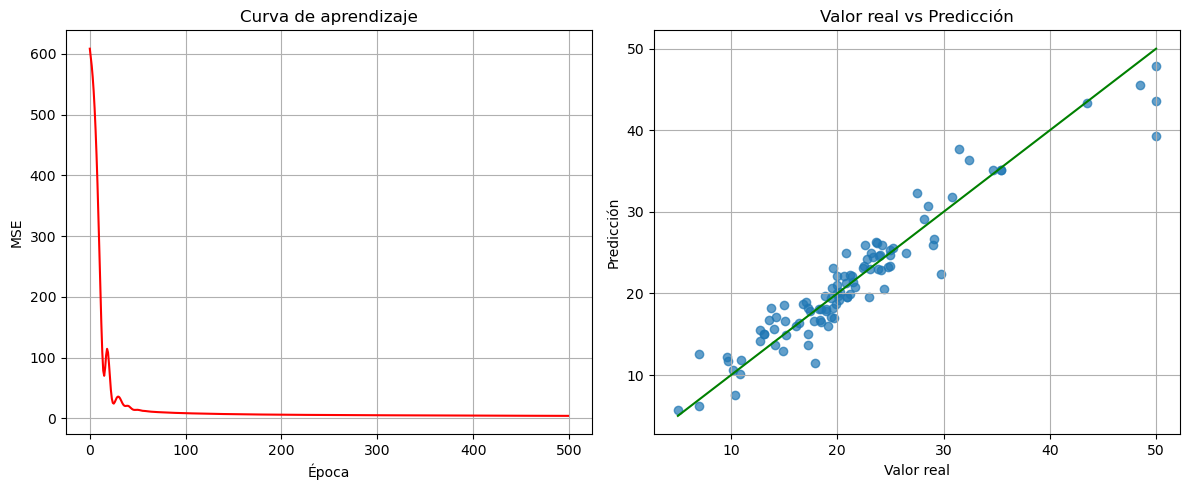

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, color='red')
plt.title("Curva de aprendizaje")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_np, predictions, alpha=0.7)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='green')
plt.title("Valor real vs Predicción")
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.grid(True)

plt.tight_layout()
plt.show()